In [219]:
import kagglehub

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LassoLarsIC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report,\
                            accuracy_score, \
                            mean_squared_error, \
                            mean_absolute_error, \
                            mean_absolute_percentage_error, \
                            r2_score

from sklearn.datasets import make_moons, make_circles, load_iris

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [220]:
path = kagglehub.dataset_download("henriqueyamahata/bank-marketing")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\DNS\.cache\kagglehub\datasets\henriqueyamahata\bank-marketing\versions\1


Данные связаны с прямыми маркетинговыми кампаниями (телефонные звонки) португальского банковского учреждения. Цель классификации — предсказать, подпишется ли клиент на срочный депозит (переменная y).

Поля:
1. Возраст клиента
2. Занятость (Профессия)
3. Семейное положение
4. Образование
5. Наличие кредита
6. Наличие жилья
7. Наличие ссуды (?loan?)
8. Тип связи
9. Месяц (последний контакт)
10. День недели (последний контакт)
11. Длительность последнего звонка
12. Компания (количество совершенных звонков для этого клиента в рамках этой кампании)
13. Количество дней, прошедших со времени последнего контакта (999 - контакта ранее не было)
14. Количество контактов, выполненных для этого клиента до текущей кампании
15. Результат предыдущей кампании
16. Темп изменения занятости
17. Индекс потребительских цен
18. Индекс потребительской уверенности
19. Ставка за 3 месяца (???)
20. Количество сотрудников (???)
21. Целевая метка - подписался клиент на срочный депозит или нет

In [222]:
data = pd.read_csv('C:/Users/DNS/.cache/kagglehub/datasets/henriqueyamahata/bank-marketing/versions/1/bank-additional-full.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [223]:
data.shape

(41188, 21)

In [224]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [225]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [226]:
data.duplicated().sum()

12

In [227]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [228]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


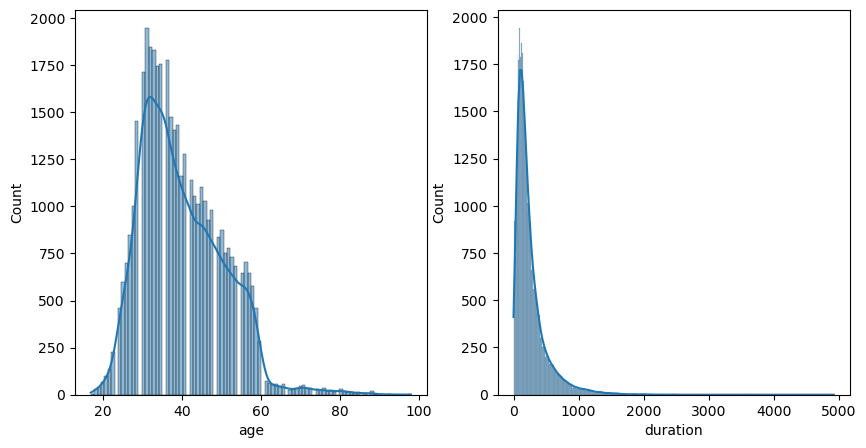

In [229]:
fig = plt.subplots(1, 2, figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(data.age, kde = True)

plt.subplot(1,2,2)
sns.histplot(data.duration, kde = True)

plt.show()

In [230]:
stats.shapiro(data.age)

ShapiroResult(statistic=0.9572418694380834, pvalue=5.505594726721475e-73)

In [231]:
stats.shapiro(data.duration)

ShapiroResult(statistic=0.721679918747429, pvalue=1.8447337141779664e-119)

In [232]:
obj_columns = list(data.select_dtypes('object').columns)

In [233]:
for i in ['job','month','day_of_week', 'education', 'y']:
    obj_columns.remove(i)

obj_columns

['marital', 'default', 'housing', 'loan', 'contact', 'poutcome']

<Axes: xlabel='y', ylabel='count'>

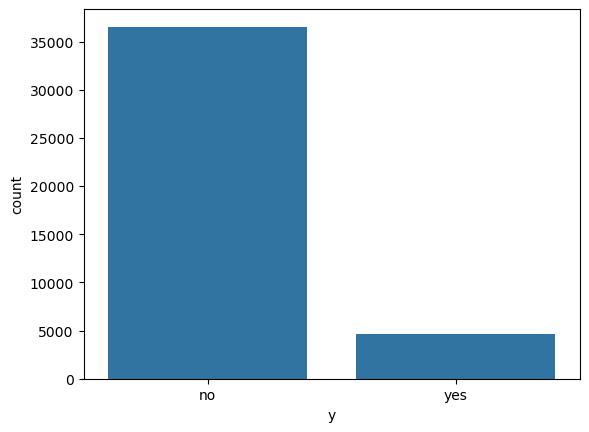

In [234]:
sns.countplot(data, x = 'y')

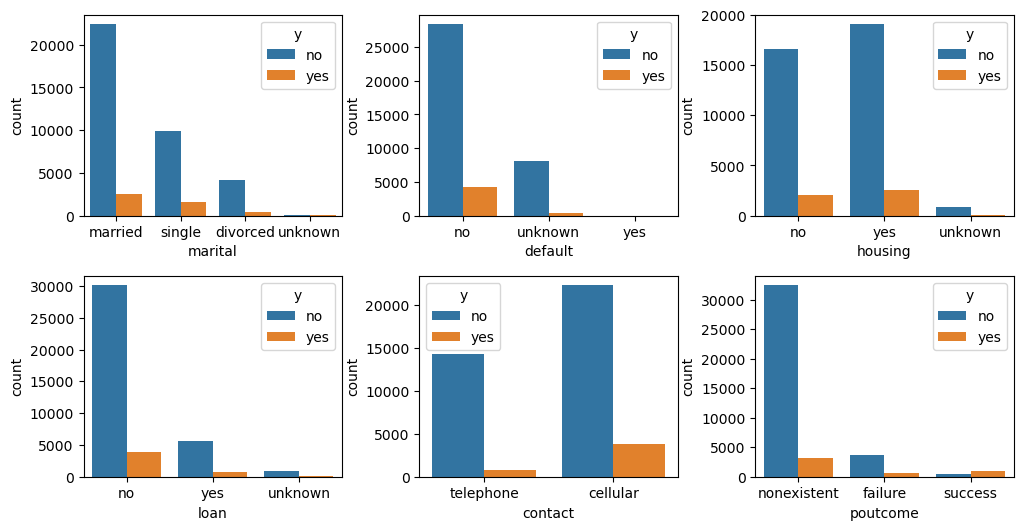

In [235]:
fig = plt.subplots(2, 3, figsize = (12,6))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i in range(len(obj_columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(data, x = obj_columns[i], hue = 'y')
plt.show()

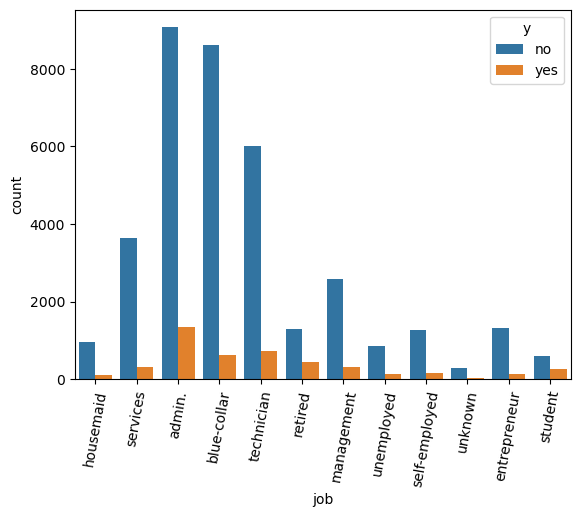

In [236]:
sns.countplot(data, x = 'job', hue = 'y')
plt.xticks(rotation = 80)
plt.show()

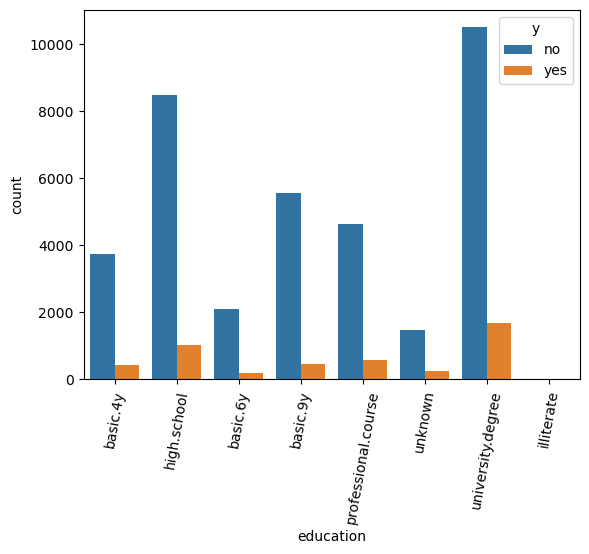

In [237]:
sns.countplot(data, x = 'education', hue = 'y')
plt.xticks(rotation = 80)
plt.show()

<Axes: xlabel='day_of_week', ylabel='count'>

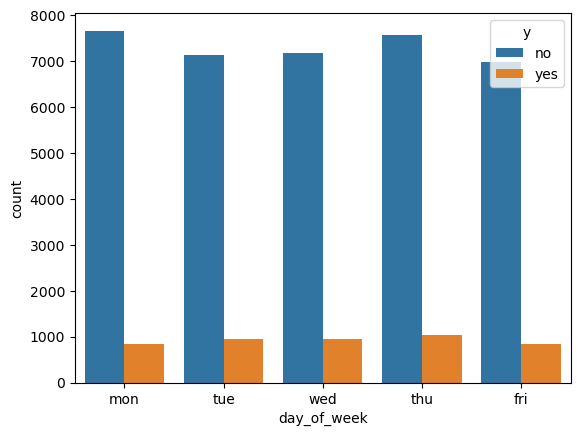

In [238]:
sns.countplot(data, x = 'day_of_week', hue = 'y')

<Axes: xlabel='month', ylabel='count'>

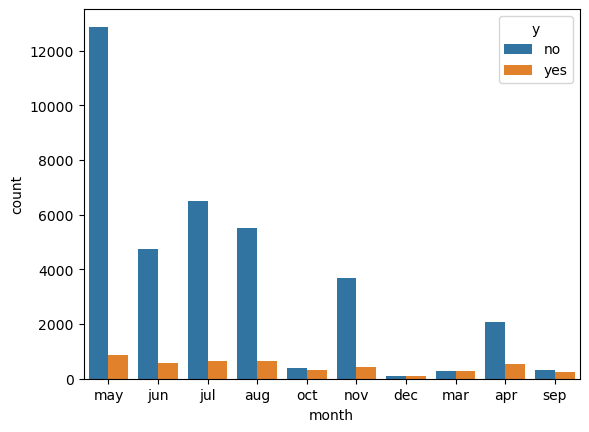

In [239]:
sns.countplot(data, x = 'month', hue = 'y')

In [240]:
data.y = data.y.apply(lambda x: 0 if x=='no'\
                  else 1)

In [241]:
corr_data = data.select_dtypes(exclude = ['object'])
corr_data = corr_data.corr().round(2)
corr_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.00,-0.00,0.00,-0.03,0.02,-0.00,0.00,0.13,0.01,-0.02,0.03
duration,-0.00,1.00,-0.07,-0.05,0.02,-0.03,0.01,-0.01,-0.03,-0.04,0.41
campaign,0.00,-0.07,1.00,0.05,-0.08,0.15,0.13,-0.01,0.14,0.14,-0.07
pdays,-0.03,-0.05,0.05,1.00,-0.59,0.27,0.08,-0.09,0.30,0.37,-0.32
previous,0.02,0.02,-0.08,-0.59,1.00,-0.42,-0.20,-0.05,-0.45,-0.50,0.23
emp.var.rate,-0.00,-0.03,0.15,0.27,-0.42,1.00,0.78,0.20,0.97,0.91,-0.30
cons.price.idx,0.00,0.01,0.13,0.08,-0.20,0.78,1.00,0.06,0.69,0.52,-0.14
cons.conf.idx,0.13,-0.01,-0.01,-0.09,-0.05,0.20,0.06,1.00,0.28,0.10,0.05
euribor3m,0.01,-0.03,0.14,0.30,-0.45,0.97,0.69,0.28,1.00,0.95,-0.31
nr.employed,-0.02,-0.04,0.14,0.37,-0.50,0.91,0.52,0.10,0.95,1.00,-0.35


<Axes: >

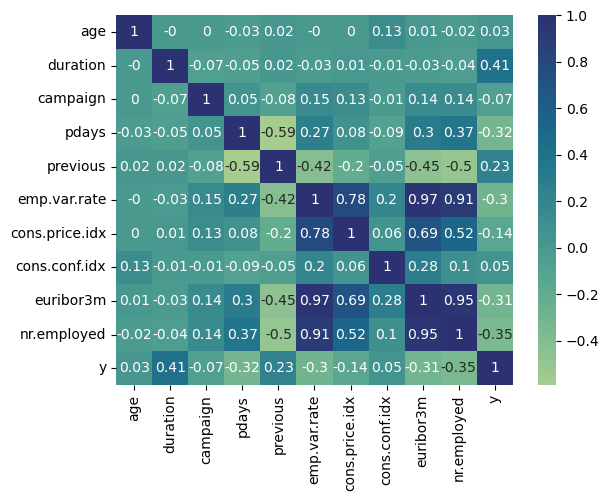

In [242]:
sns.heatmap(corr_data,  annot = True, cmap = 'crest')

Преобразуем датасет для дальнейшей работы с ним.

In [244]:
data = data.drop(['day_of_week', 'month'], axis = 1)

In [245]:
data.contact = data.contact.apply(lambda x: 0 if x == 'telephone'\
                                  else 1)

data.job = data.job.apply(lambda x: -1 if x == 'unknown'\
                          else 1 if x == 'unemployed'\
                          else 2 if x == 'housemaid'\
                          else 3 if x == 'services'\
                          else 4 if x == 'admin.'\
                          else 5 if x == 'blue-collar'\
                          else 6 if x == 'technician'\
                          else 7 if x == 'retired'\
                          else 8 if x == 'management'\
                          else 9 if x == 'self-employed'\
                          else 10 if x == 'entrepreneur'\
                          else 11)

data.marital = data.marital.apply(lambda x: -1 if x == 'unknown'\
                                 else 1 if x == 'married'\
                                 else 2 if x == 'single'\
                                 else 3)

data.education = data.education.apply(lambda x: -1 if x == 'unknown'\
                                     else 1 if x in ('basic.4y', 'basic.6y', 'basic.9y')\
                                     else 2 if x == 'high.school'\
                                     else 3 if x == 'professional.course'\
                                     else 4 if x == 'university.degree'\
                                     else 5)

data.default = data.default.apply(lambda x: 0 if x == 'no'\
                              else 1 if x=='yes'\
                              else -1)

data.housing = data.housing.apply(lambda x: 0 if x == 'no'\
                              else 1 if x == 'yes'\
                              else -1)

data.loan = data.loan.apply(lambda x: 0 if x == 'no'\
                        else 1 if x == 'yes'\
                        else -1)

data.poutcome = data.poutcome.apply(lambda x: 0 if x == 'failure'\
                                else 2 if x == 'success'\
                                else -1)

data.pdays = data.pdays.apply(lambda x: -1 if x==999\
                          else 1 if x<=10\
                          else 2 if x<=20\
                          else 3)

In [246]:
data.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,2,1,1,0,0,0,0,261,1,-1,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3,1,2,-1,0,0,0,149,1,-1,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3,1,2,0,1,0,0,226,1,-1,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,4,1,1,0,0,0,0,151,1,-1,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3,1,2,0,0,1,0,307,1,-1,0,-1,1.1,93.994,-36.4,4.857,5191.0,0


In [247]:
data_columns = data.columns

In [248]:
n_scaler = MinMaxScaler()
data_norm = n_scaler.fit_transform(data)

data = pd.DataFrame(data_norm, columns = data_columns)
data.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,0.250000,0.5,0.333333,0.5,0.5,0.5,0.0,0.053070,0.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.493827,0.333333,0.5,0.500000,0.0,0.5,0.5,0.0,0.030297,0.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.246914,0.333333,0.5,0.500000,0.5,1.0,0.5,0.0,0.045954,0.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.283951,0.416667,0.5,0.333333,0.5,0.5,0.5,0.0,0.030704,0.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.481481,0.333333,0.5,0.500000,0.5,0.5,1.0,0.0,0.062424,0.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


Реализовать логистическую регрессию для задачи классификации.

In [278]:
X = data.drop('y', axis = 1)
y = data.y

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [292]:
#data_pred = X_test

In [294]:
#data_pred['y'] = y_test

In [296]:
y_pred_logreg = logreg.predict(X_test)
data_pred['logreg'] = y_pred_logreg

print(f'Accuracy: {round(accuracy_score(y_test, y_pred_logreg), 3) * 100} %')

Accuracy: 90.4 %


<Axes: xlabel='age', ylabel='duration'>

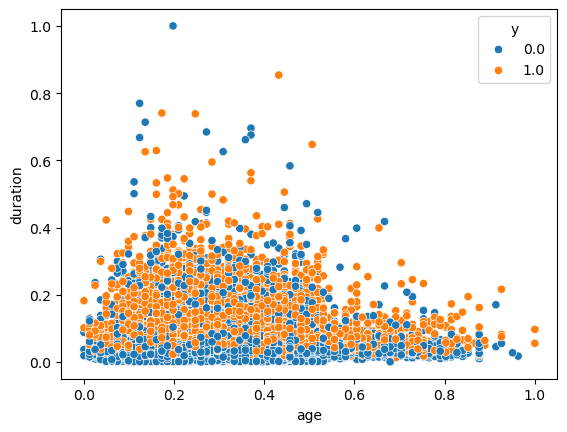

In [298]:
sns.scatterplot(data = data, x = "age", y = "duration", hue = "y")

Применить метод k ближайших соседей для решения задач классификации и регрессии с использованием собственных пользовательских данных.

In [67]:
neighbors_num = np.arange(0, 25)

acc_scores = []
for k in neighbors_num:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_scores.append(scores.mean()*100)
    print(f"K: {k_value} Mean Accuracy: {round(scores.mean()*100, 3)}  std: {round(scores.std()*100, 3)}")

optimal_k = neighbors_num[acc_scores.index(max(acc_scores))]
print (f"The optimal number of neighbors is {optimal_k} with {round(acc_scores[optimal_k], 3)}")

K: 1 Mean Accuracy: 87.876  std: 0.657
K: 2 Mean Accuracy: 89.314  std: 0.483
K: 3 Mean Accuracy: 89.292  std: 0.597
K: 4 Mean Accuracy: 89.663  std: 0.478
K: 5 Mean Accuracy: 89.65  std: 0.532
K: 6 Mean Accuracy: 89.759  std: 0.512
K: 7 Mean Accuracy: 89.831  std: 0.588
K: 8 Mean Accuracy: 89.865  std: 0.483
K: 9 Mean Accuracy: 89.856  std: 0.409
K: 10 Mean Accuracy: 89.921  std: 0.4
K: 11 Mean Accuracy: 89.912  std: 0.395
K: 12 Mean Accuracy: 89.927  std: 0.324
K: 13 Mean Accuracy: 89.843  std: 0.358
K: 14 Mean Accuracy: 89.862  std: 0.388
K: 15 Mean Accuracy: 89.868  std: 0.394
K: 16 Mean Accuracy: 89.875  std: 0.406
K: 17 Mean Accuracy: 89.946  std: 0.408
K: 18 Mean Accuracy: 89.952  std: 0.394
K: 19 Mean Accuracy: 89.977  std: 0.393
K: 20 Mean Accuracy: 89.993  std: 0.422
K: 21 Mean Accuracy: 89.959  std: 0.418
K: 22 Mean Accuracy: 90.015  std: 0.433
K: 23 Mean Accuracy: 89.977  std: 0.397
K: 24 Mean Accuracy: 89.999  std: 0.459
K: 25 Mean Accuracy: 90.012  std: 0.412
The optimal 

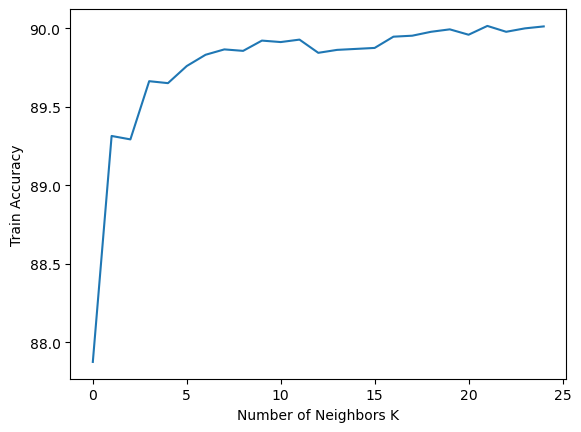

In [68]:
plt.plot(neighbors_num, acc_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [77]:
knn = KNeighborsClassifier(n_neighbors = 22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(f'KNN Accuracy: {round(accuracy_score(y_test, knnpred), 3)*100} %')

KNN Accuracy: 97.39999999999999 %


In [79]:
knn_regressor = KNeighborsRegressor(n_neighbors = 21)
knn_regressor.fit(X_train, y_train)
knn_reg_pred = knn_regressor.predict(X_test)

print(f'KNN Regressor MSE: {round(mean_squared_error(y_test, knn_reg_pred), 3)*100} %')

KNN Regressor MSE: 4.6 %


 Реализовать регрессионную версию метода опорных векторов и применить к собственным пользовательским данным.

In [76]:
svr = SVR(kernel = 'rbf', C = 1)
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

print(f'SVR MSE: {round(mean_squared_error(y_test, svr_pred), 3)*100} %')

SVR MSE: 7.3999999999999995 %


 Реализовать метод опорных векторов для различных ядерных функций для классификации модельных и реальных пользовательских данных.

In [78]:
svc_linear = SVC(kernel = 'linear', probability = True)
svc_linear.fit(X_train, y_train)
svc_linear_pred = svc_linear.predict(X_test)

print(f'SVC(linear) Accuracy: {round(accuracy_score(y_test, svc_linear_pred), 3)*100} %')

SVC(linear) Accuracy: 89.9 %


In [79]:
svc_poly = SVC(kernel = 'poly', probability = True)
svc_poly.fit(X_train, y_train)
svc_poly_pred = svc_poly.predict(X_test)

print(f'SVC(poly) Accuracy: {round(accuracy_score(y_test, svc_poly_pred), 3)*100} %')

SVC(poly) Accuracy: 90.2 %


In [80]:
svc_rbf = SVC(kernel = 'rbf', probability = True)
svc_rbf.fit(X_train, y_train)
svc_rbf_pred = svc_rbf.predict(X_test)

print(f'SVC(rbf) Accuracy: {round(accuracy_score(y_test, svc_rbf_pred), 3)*100} %')

SVC(rbf) Accuracy: 90.0 %


In [81]:
svc_sigmoid = SVC(kernel = 'sigmoid',probability = True)
svc_sigmoid.fit(X_train, y_train)
svc_sigmoid_pred = svc_sigmoid.predict(X_test)

print(f'SVC(sigmoid) Accuracy: {round(accuracy_score(y_test, svc_sigmoid_pred), 3)*100} %')

SVC(sigmoid) Accuracy: 82.19999999999999 %


Продемонстрировать примеры оценивания моделей с использованием метрик MSE (RMSE), MAE, MAPE, SMAPE и WAPE в задачах регрессии.

In [88]:
def SMAPE(truth, pred):
    return 1/len(truth)*np.sum(2*np.abs(truth - pred)/(np.abs(truth) + np.abs(pred)))

#np.mean ^

def WAPE(truth, pred):
    return np.sum(abs(truth - pred))/np.sum(np.abs(truth))

In [90]:
#Логистическая регрессия
print(f'LogReg MSE: {mean_squared_error(y_test, y_pred_logreg)}  \n')
print(f'LogReg RMSE: {mean_squared_error(y_test, y_pred_logreg, squared = False)}\n')
print(f'LogReg MAE: {mean_absolute_error(y_test, y_pred_logreg)}  \n')
#print(f'LogReg MAPE: {mean_absolute_percentage_error(y_test, y_pred_logreg)}\n')
print(f'LogReg SMAPE: {SMAPE(y_test, y_pred_logreg)} \n')
print(f'LogReg WAPE: {WAPE(y_test, y_pred_logreg)}')

LogReg MSE: 0.09581631526658571  

LogReg RMSE: 0.309542105805633

LogReg MAE: 0.09581631526658571  

LogReg MAPE: 83519675173666.42

LogReg SMAPE: 0.19163263053317145 

LogReg WAPE: 0.821969696969697


In [92]:
#Метод опорных векторов регрессия
print(f'SVR MSE: {mean_squared_error(y_test, svr_pred)}  \n')
print(f'SVR RMSE: {mean_squared_error(y_test, svr_pred, squared = False)}\n')
print(f'SVR MAE: {mean_absolute_error(y_test, svr_pred)}  \n')
#print(f'SVR MAPE: {mean_absolute_percentage_error(y_test, svr_pred)}\n')
#print(f'SVR SMAPE: {SMAPE(y_test, svr_pred)} \n')
#print(f'SVR WAPE: {WAPE(y_test, svr_pred)}')

SVR MSE: 0.07358684417694711  

SVR RMSE: 0.271268951737841

SVR MAE: 0.13389639255816754  

SVR MAPE: 254733692525607.84

SVR SMAPE: 1.8956784806780351 

SVR WAPE: 1.1486433903261741


In [94]:
#KNN регрессия
print(f'KNN Regressor MSE: {mean_squared_error(y_test, knn_reg_pred)}  \n')
print(f'KNN Regressor RMSE: {mean_squared_error(y_test, knn_reg_pred, squared = False)}\n')
print(f'KNN Regressor MAE: {mean_absolute_error(y_test, knn_reg_pred)}  \n')
print(f'KNN Regressor MAPE: {mean_absolute_percentage_error(y_test, knn_reg_pred)}\n')
print(f'KNN Regressor SMAPE: {SMAPE(y_test, knn_reg_pred)} \n')
print(f'KNN Regressor WAPE: {WAPE(y_test, knn_reg_pred)}')

KNN Regressor MSE: 0.0763783601529805  

KNN Regressor RMSE: 0.2763663513399931

KNN Regressor MAE: 0.13318509874421125  

KNN Regressor MAPE: 242936198024989.88

KNN Regressor SMAPE: 0.940150667597218 

KNN Regressor WAPE: 1.1425414862914864


Продемонстрировать примеры различных соотношений для AUC-ROC.

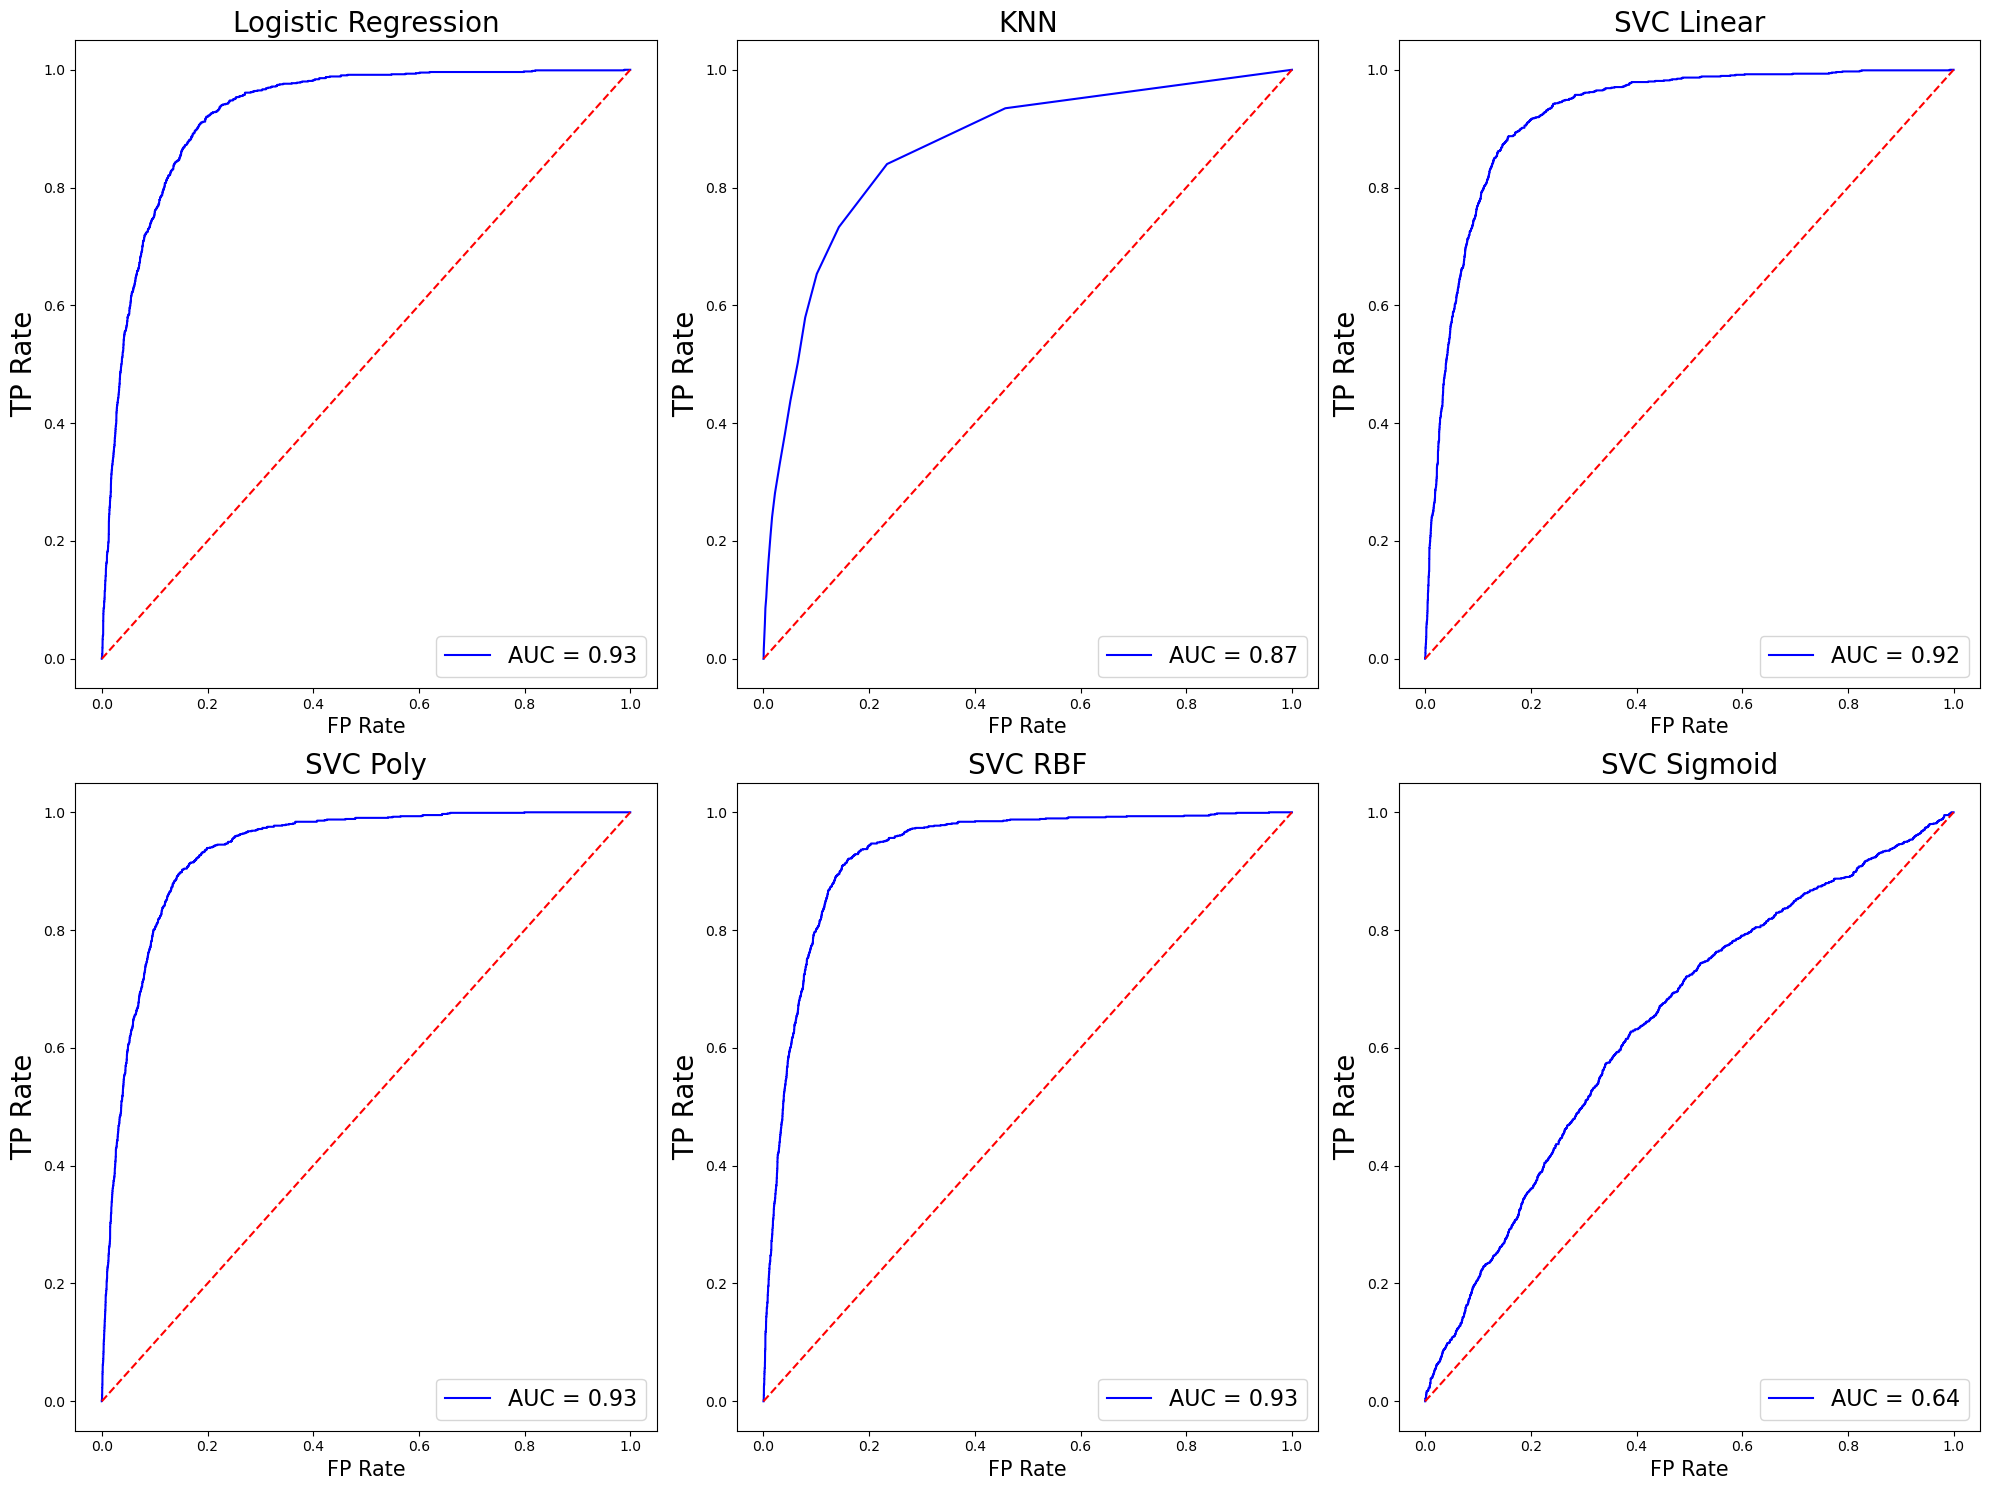

In [97]:
fig, ax_arr = plt.subplots(2,3, figsize = (20,15))

#Логистическая регрессия
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

plt.subplot(2,3,1)
plt.plot(fprlog, tprlog, 'b', label = f'AUC = {round(roc_auclog, 2)}')
plt.plot([0, 1], [0, 1],'r--')
plt.title('Logistic Regression',fontsize = 20)
plt.ylabel('TP Rate',fontsize=20)
plt.xlabel('FP Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

#KNN
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

plt.subplot(2,3,2)
plt.plot(fprknn, tprknn, 'b', label = f'AUC = {round(roc_aucknn, 2)}')
plt.plot([0, 1], [0, 1],'r--')
plt.title('KNN',fontsize = 20)
plt.ylabel('TP Rate',fontsize=20)
plt.xlabel('FP Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

#SVC LINEAR
probs = svc_linear.predict_proba(X_test)
preds = probs[:,1]
fprsvc_l, tprsvc_l, thresholdsvc_l = metrics.roc_curve(y_test, preds)
roc_aucsvc_l = metrics.auc(fprsvc_l, tprsvc_l)

plt.subplot(2,3,3)
plt.plot(fprsvc_l, tprsvc_l, 'b', label = f'AUC = {round(roc_aucsvc_l, 2)}')
plt.plot([0, 1], [0, 1],'r--')
plt.title('SVC Linear',fontsize = 20)
plt.ylabel('TP Rate',fontsize=20)
plt.xlabel('FP Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

#SVC POLY
probs = svc_poly.predict_proba(X_test)
preds = probs[:,1]
fprsvc_p, tprsvc_p, thresholdsvc_p = metrics.roc_curve(y_test, preds)
roc_aucsvc_p = metrics.auc(fprsvc_p, tprsvc_p)

plt.subplot(2,3,4)
plt.plot(fprsvc_p, tprsvc_p, 'b', label = f'AUC = {round(roc_aucsvc_p, 2)}')
plt.plot([0, 1], [0, 1],'r--')
plt.title('SVC Poly',fontsize = 20)
plt.ylabel('TP Rate',fontsize=20)
plt.xlabel('FP Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

#SVC RBF
probs = svc_rbf.predict_proba(X_test)
preds = probs[:,1]
fprsvc_rbf, tprsvc_rbf, thresholdsvc_rbf = metrics.roc_curve(y_test, preds)
roc_aucsvc_rbf = metrics.auc(fprsvc_rbf, tprsvc_rbf)

plt.subplot(2,3,5)
plt.plot(fprsvc_rbf, tprsvc_rbf, 'b', label = f'AUC = {round(roc_aucsvc_rbf, 2)}')
plt.plot([0, 1], [0, 1],'r--')
plt.title('SVC RBF',fontsize = 20)
plt.ylabel('TP Rate',fontsize=20)
plt.xlabel('FP Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

#SVC Sigmoid
probs = svc_sigmoid.predict_proba(X_test)
preds = probs[:,1]
fprsvc_sigmoid, tprsvc_sigmoid, thresholdsvc_sigmoid = metrics.roc_curve(y_test, preds)
roc_aucsvc_sigmoid = metrics.auc(fprsvc_sigmoid, tprsvc_sigmoid)

plt.subplot(2,3,6)
plt.plot(fprsvc_sigmoid, tprsvc_sigmoid, 'b', label = f'AUC = {round(roc_aucsvc_sigmoid, 2)}')
plt.plot([0, 1], [0, 1],'r--')
plt.title('SVC Sigmoid',fontsize = 20)
plt.ylabel('TP Rate',fontsize=20)
plt.xlabel('FP Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

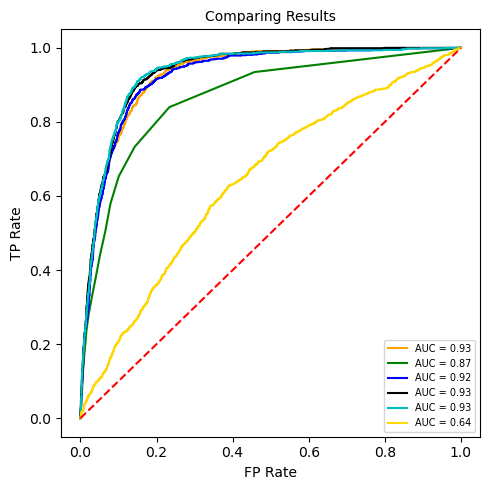

In [98]:
plt.figure(figsize = (5,5))

plt.plot(fprlog, tprlog, 'orange', label = f'AUC = {round(roc_auclog, 2)}')
plt.plot(fprknn, tprknn, 'g', label = f'AUC = {round(roc_aucknn, 2)}')
plt.plot(fprsvc_l, tprsvc_l, 'b', label = f'AUC = {round(roc_aucsvc_l, 2)}')
plt.plot(fprsvc_p, tprsvc_p, 'k', label = f'AUC = {round(roc_aucsvc_p, 2)}')
plt.plot(fprsvc_rbf, tprsvc_rbf, 'c', label = f'AUC = {round(roc_aucsvc_rbf, 2)}')
plt.plot(fprsvc_sigmoid, tprsvc_sigmoid, 'gold', label = f'AUC = {round(roc_aucsvc_sigmoid, 2)}')
plt.plot([0, 1], [0, 1],'r--')
plt.title('Comparing Results',fontsize = 10)
plt.ylabel('TP Rate',fontsize = 10)
plt.xlabel('FP Rate',fontsize = 10)
plt.legend(loc = 'lower right', prop = {'size': 7})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

Продемонстрировать примеры оценивания моделей с использованием метрик accuracy, точность, полнота, F-мера в задачах классификации.

In [102]:
print(f'Logistic Regression: \n {classification_report(y_test, y_pred_logreg)} \n')
print(f'KNN: \n {classification_report(y_test, knnpred)}')
print(f'SVC(linear): \n {classification_report(y_test, svc_linear_pred)} \n')
print(f'SVC(poly): \n {classification_report(y_test, svc_poly_pred)}')
print(f'SVC(rbf): \n {classification_report(y_test, svc_rbf_pred)} \n')
print(f'SVC(sigmoid): \n {classification_report(y_test, svc_sigmoid_pred)}')

Logistic Regression: 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      8003
         1.0       0.68      0.34      0.45      1056

    accuracy                           0.90      9059
   macro avg       0.80      0.66      0.70      9059
weighted avg       0.89      0.90      0.89      9059
 

KNN: 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      8003
         1.0       0.66      0.24      0.35      1056

    accuracy                           0.90      9059
   macro avg       0.78      0.61      0.65      9059
weighted avg       0.88      0.90      0.88      9059

SVC(linear): 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      8003
         1.0       0.67      0.26      0.38      1056

    accuracy                           0.90      9059
   macro avg       0.79      0.62      0.66      9059
weighted avg       0.88    

 Реализовать классический и скорректированный коэффициенты детерминации для выбора модели.

In [108]:
print(f'Logistic Regression R2: {r2_score(y_test, y_pred_logreg)} \n')
print(f'KNN R2: {r2_score(y_test, knnpred)}\n')
print(f'SVC(linear) R2: {r2_score(y_test, svc_linear_pred)} \n')
print(f'SVC(poly) R2: {r2_score(y_test, svc_poly_pred)} \n')
print(f'SVC(rbf) R2: {r2_score(y_test, svc_rbf_pred)} \n')
print(f'SVC(sigmoid) R2: {r2_score(y_test, svc_sigmoid_pred)}')

Logistic Regression R2: 0.06957097527820999 

KNN R2: 0.0009679135475710865

SVC(linear) R2: 0.021334447498854603 

SVC(poly) R2: 0.05027636416646786 

SVC(rbf) R2: 0.030981753054725614 

SVC(sigmoid) R2: -0.7300834630195496


In [110]:
def r2_adj_score(truth, pred):
    n = data.shape[0]
    p = data.shape[1]
    r2 = r2_score(truth, pred)

    r2_adj = 1-(1-r2)*((n-1)/(n-p-1))
    return r2_adj

In [112]:
print(f'Logistic Regression R2_adj: {r2_adj_score(y_test, y_pred_logreg)} \n')
print(f'KNN R2_adj: {r2_adj_score(y_test, knnpred)}\n')
print(f'SVC(linear) R2_adj: {r2_adj_score(y_test, svc_linear_pred)} \n')
print(f'SVC(poly) R2_adj: {r2_adj_score(y_test, svc_poly_pred)} \n')
print(f'SVC(rbf) R2_adj: {r2_adj_score(y_test, svc_rbf_pred)} \n')
print(f'SVC(sigmoid) R2_adj: {r2_adj_score(y_test, svc_sigmoid_pred)}')

Logistic Regression R2_adj: 0.06914143519973504 

KNN R2_adj: 0.0005067023112361735

SVC(linear) R2_adj: 0.020882638637509388 

SVC(poly) R2_adj: 0.04983791657484482 

SVC(rbf) R2_adj: 0.030534397949954384 

SVC(sigmoid) R2_adj: -0.7308821700318291


Сгенерировать данные, повторяющие пример из лекций для полиномиального обогащения, и реализовать решение задачи классификации с использованием метода опорных векторов.

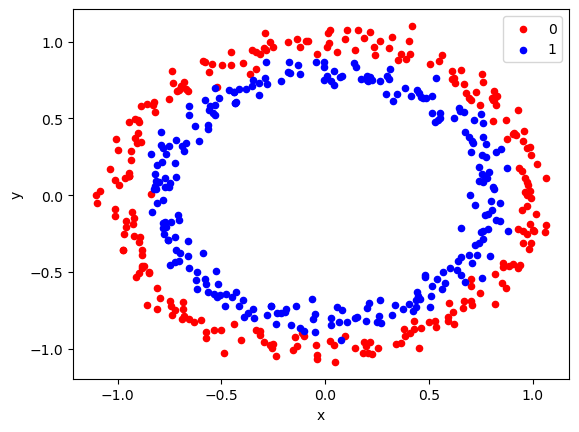

In [115]:
X, y = make_circles(n_samples = 500, noise = 0.05)

df_1 = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df_1.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [117]:
X_poly = df_1[['x','y']]
y_poly = df_1.label

In [119]:
X_tr, X_te, y_tr, y_te = train_test_split(X_poly, y_poly, test_size=0.22, random_state=0)

In [121]:
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    svc = SVC(kernel = i, probability = True)
    svc.fit(X_tr, y_tr)
    svc_pred = svc.predict(X_te)

    print(f'SVC({i}) Accuracy: {round(accuracy_score(y_te, svc_pred), 3)*100} %')

SVC(linear) Accuracy: 48.199999999999996 %
SVC(poly) Accuracy: 52.7 %
SVC(rbf) Accuracy: 97.3 %
SVC(sigmoid) Accuracy: 48.199999999999996 %


Сгенерировать данные, повторяющие примеры из лекций (U-образные, концентрические окружности, XOR, с выбросами), и реализовать на них различные версии метода k ближайших соседей в задачах классификации и регрессии, включая радиусный классификатор, взвешенные методы k ближайших соседей и ядерные функции.

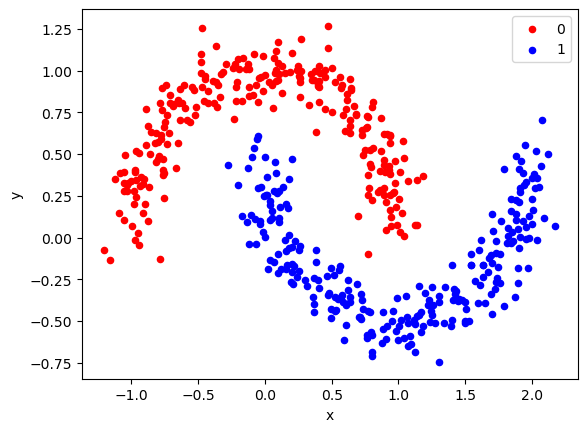

In [124]:
# U-shaped
X, y = make_moons(n_samples=500, noise=0.1)

df_2 = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df_2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [126]:
X_u = df_2[['x','y']]
y_u = df_2.label

In [128]:
X_tr_u, X_te_u, y_tr_u, y_te_u = train_test_split(X_u, y_u, test_size=0.22, random_state=0)

In [130]:
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    svc = SVC(kernel = i, probability = True)
    svc.fit(X_tr_u, y_tr_u)
    svc_pr = svc.predict(X_te_u)

    print(f'SVC({i}) Accuracy: {round(accuracy_score(y_te_u, svc_pr), 3)*100} %')

SVC(linear) Accuracy: 86.4 %
SVC(poly) Accuracy: 90.0 %
SVC(rbf) Accuracy: 99.1 %
SVC(sigmoid) Accuracy: 64.5 %


In [192]:
r_knn_1 = RadiusNeighborsClassifier(radius = 1.0)
r_knn_1.fit(X_tr_u, y_tr_u)
r_knn_pred = r_knn_1.predict(X_te_u)

print(f'RKNN(U-shape) Accuracy: {round(accuracy_score(y_te_u, r_knn_pred), 3)*100} %')

RKNN(U-shape) Accuracy: 80.0 %


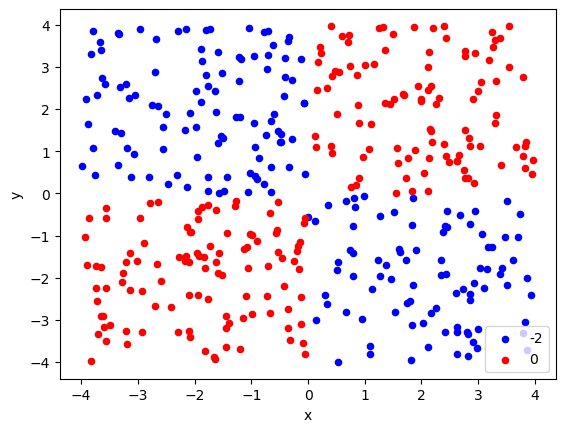

In [162]:
# XOR
x = np.random.uniform(low = -4, high = 4, size = (400,2))
y = np.bitwise_xor(np.sign(x[:,0]).astype(int),np.sign(x[:,1]).astype(int))

df_3 = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', -2:'blue'}

fig, ax = plt.subplots()
grouped = df_3.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [164]:
X_xor = df_3[['x','y']]
y_xor = df_3.label

In [166]:
X_tr_xor, X_te_xor, y_tr_xor, y_te_xor = train_test_split(X_xor, y_xor, test_size=0.22, random_state=0)

In [168]:
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    svc = SVC(kernel = i, probability = True)
    svc.fit(X_tr_xor, y_tr_xor)
    svc_pr = svc.predict(X_te_xor)

    print(f'SVC({i}) Accuracy: {round(accuracy_score(y_te_xor, svc_pr), 3)*100} %')

SVC(linear) Accuracy: 50.0 %
SVC(poly) Accuracy: 51.1 %
SVC(rbf) Accuracy: 94.3 %
SVC(sigmoid) Accuracy: 51.1 %


In [200]:
r_knn_2 = RadiusNeighborsClassifier(radius = 3.0)
r_knn_2.fit(X_tr_xor, y_tr_xor)
r_knn_pred = r_knn_2.predict(X_te_xor)

print(f'RKNN(XOR) Accuracy: {round(accuracy_score(y_te_xor, r_knn_pred), 3)*100} %')

RKNN(XOR) Accuracy: 95.5 %


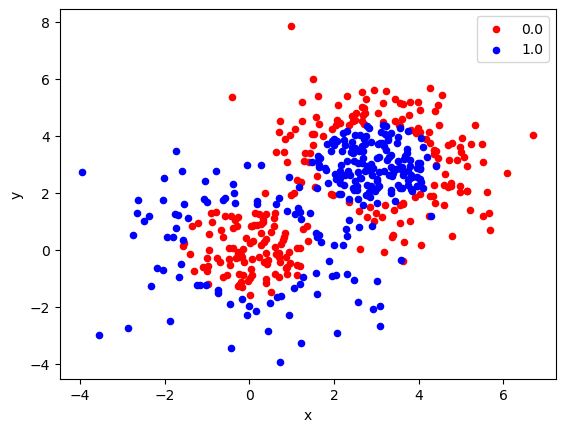

In [194]:
# Две окружности
data = np.genfromtxt('3.concertriccir2.csv', delimiter = ',')
X = data[:, :2]
y = data[:,2] 

df_4 = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df_4.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [196]:
X_tr, X_te, y_tr, y_te = train_test_split(df_4[['x', 'y']], df_4.label, test_size=0.25, random_state=0)

In [198]:
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    svc = SVC(kernel = i, probability = True)
    svc.fit(X_tr, y_tr)
    svc_pred = svc.predict(X_te)

    print(f'SVC({i}) Accuracy: {round(accuracy_score(y_te, svc_pred), 3)*100} %')

SVC(linear) Accuracy: 43.2 %
SVC(poly) Accuracy: 61.6 %
SVC(rbf) Accuracy: 89.60000000000001 %
SVC(sigmoid) Accuracy: 47.199999999999996 %


In [226]:
r_knn_3 = RadiusNeighborsClassifier(radius = 2.0)
r_knn_3.fit(X_tr, y_tr)
r_knn_pred = r_knn_3.predict(X_te)

print(f'RKNN(CC-s) Accuracy: {round(accuracy_score(y_te, r_knn_pred), 3)*100} %')

RKNN(CC-s) Accuracy: 68.0 %


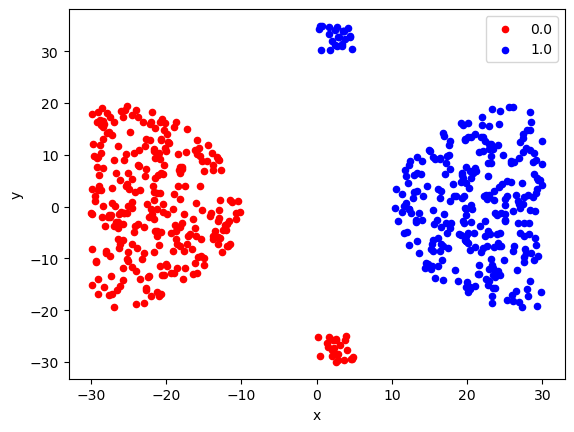

In [228]:
# Выбросы
data = np.genfromtxt('5.outlier.csv', delimiter = ',')
X = data[:, :2]
y = data[:,2] 

df_5 = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df_5.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [230]:
X_tr, X_te, y_tr, y_te = train_test_split(df_5[['x', 'y']], df_5.label, test_size=0.2, random_state=0)

In [232]:
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    svc = SVC(kernel = i, probability = True)
    svc.fit(X_tr, y_tr)
    svc_pred = svc.predict(X_te)

    print(f'SVC({i}) Accuracy: {round(accuracy_score(y_te, svc_pred), 3)*100} %')

SVC(linear) Accuracy: 100.0 %
SVC(poly) Accuracy: 100.0 %
SVC(rbf) Accuracy: 100.0 %
SVC(sigmoid) Accuracy: 100.0 %


In [242]:
r_knn_4 = RadiusNeighborsClassifier(radius = 3.0)
r_knn_4.fit(X_tr, y_tr)
r_knn_pred = r_knn_4.predict(X_te)

print(f'RKNN(CC-s) Accuracy: {round(accuracy_score(y_te, r_knn_pred), 3)*100} %')

RKNN(CC-s) Accuracy: 100.0 %


С использованием метрик, оценить качество заполнения пропусков в пользовательских данных.

In [313]:
null_data = pd.read_csv('train.csv')
null_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [315]:
null_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

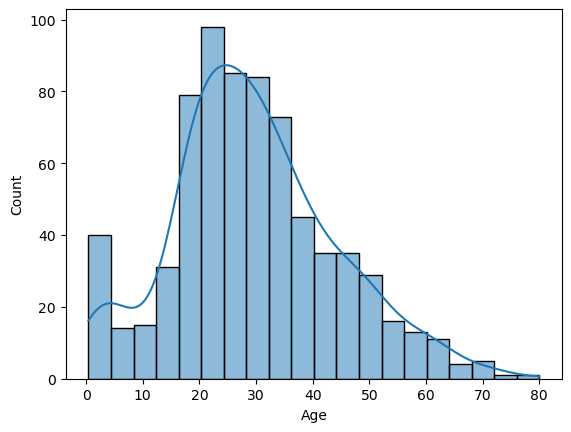

In [317]:
sns.histplot(null_data.Age, kde = True)
plt.show()

In [331]:
data_mean = null_data.Age.fillna(null_data.Age.mean())
data_median = null_data.Age.fillna(null_data.Age.median())
data_mode = null_data.Age.fillna(null_data.Age.mode())

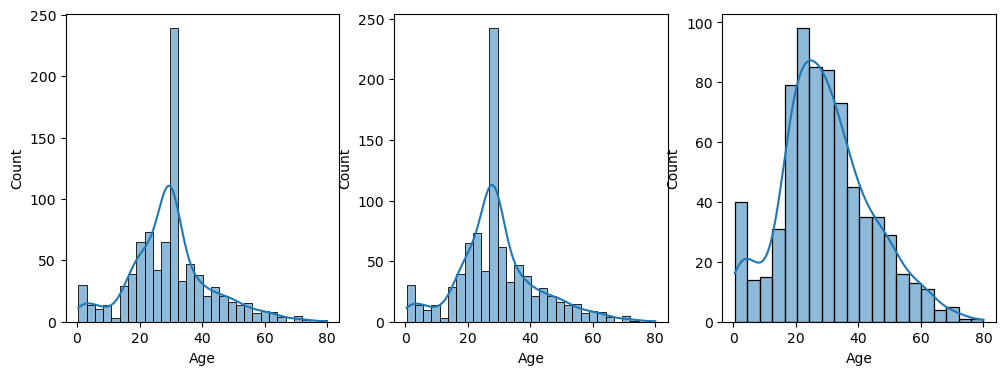

In [349]:
fig = plt.subplots(1, 3, figsize = (12,4))
data_list = [data_mean, data_median, data_mode]
for i in range(len(data_list)):
    plt.subplot(1,3,i+1)
    sns.histplot(data_list[i], kde = True)
plt.show()

Самостоятельно программно реализовать какие-либо методы классификации и регрессии.

In [48]:
class KNN:
    def __init__(self, n_neighbors = 50, regression=False):
        self.n_neighbors = n_neighbors
        self.regression = regression

    def fit(self, X_train, y_train):
        self.X_train, self.y_train = X_train, y_train

    def _euclidean_distances(self, x_test_i):
        return np.sqrt(np.sum((self.X_train - x_test_i) ** 2, axis=1))

    def _make_prediction(self, x_test_i):
        distances = self._euclidean_distances(x_test_i)   
        k_nearest_indexes = np.argsort(distances)[:self.n_neighbors]
        targets = self.y_train[k_nearest_indexes]   

        return np.mean(targets) if self.regression else np.bincount(targets).argmax()

    def predict(self, X_test):
        return np.array([self._make_prediction(x) for x in X_test])

In [50]:
X, y = load_iris(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=0)

In [52]:
knn_realization = KNN()
knn_realization.fit(X_train, y_train)
knn_realization_pred = knn_realization.predict(X_test)

In [54]:
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

In [56]:
print(f'KNN-realization Accuracy: {round(accuracy_score(y_test, knn_realization_pred), 3)*100} % \n')
print(f'KNN-library Accuracy: {round(accuracy_score(y_test, knnpred), 3)*100} %')

KNN-realization Accuracy: 89.5 % 

KNN-library Accuracy: 89.5 %


Реализовать процедуру выбора модели с использование различных версий критерия Акаике и байесовского информационных критериев.